# Tugas 2
Achmad Khosyi' Assajjad Ramandanta
5025211007
- LPF
- HPF
- Homomorphic Filter

### Import Library

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shutil

### Create Directory

In [2]:
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

base_dir = "."

directories = [
    "Original",
    "Output/FFT/1D",
    "Output/FFT/2D",
    "Output/Grayed",
    "Output/LFP/BLFP",
    "Output/LFP/GLFP",
    "Output/LFP/ILFP",
    "Output/HPF/BHPF",
    "Output/HPF/GHPF",
    "Output/HPF/IHPF",
    "Output/NotchFilter/Butterworth_Notch_Reject_Filter",
    "Output/NotchFilter/Notch_Pass_Filter",
    "Output/NotchFilter/Vertical_Notch_Reject_Filter",
    "Output/HomomorphicFilter"
]

for directory in directories:
    create_directory(os.path.join(base_dir, directory))

### Import Picture

### Local
Run this if you are on local

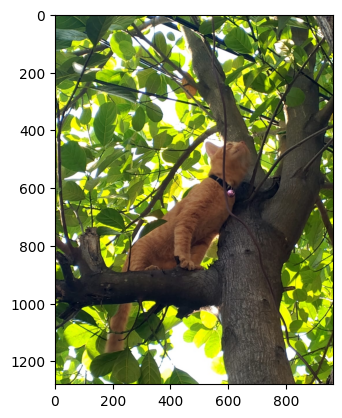

In [22]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Import Image
def import_image():
    Tk().withdraw()
    img_path = askopenfilename(title="Select an image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    
    if img_path:
        shutil.copy(img_path, 'Original')
        # print(f"Image saved to {img_path}")
        return img_path
    else:
        print("No image selected.")
        return None
    
# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")
    
image_path = import_image()
display_image(image_path)

### Google Colab
Run this if you are on google colab

In [ ]:
from google.colab import files

# Import Image
def import_image_colab():
    uploaded = files.upload()
    
    if uploaded:
        img_path = list(uploaded.keys())[0]
        
        if not os.path.exists('Original'):
            os.makedirs('Original')
        shutil.move(img_path, os.path.join('Original', img_path))
        
        return os.path.join('Original', img_path)
    else:
        print("No image uploaded.")
        return None

# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")

image_path = import_image_colab()
display_image(image_path)

### Turn The Image Into Gray Scale

Grayscale image saved to: Output/Grayed\mycat_grayed.jpg


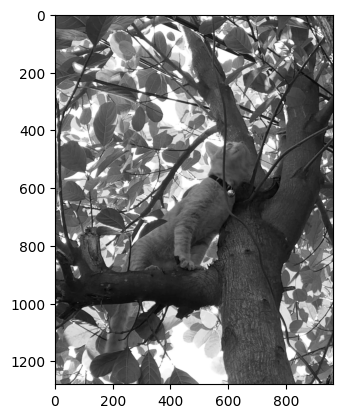

In [23]:
# Gray Scaling
def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert("L")
    return img

def save_grayscale_image(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    gray_img = convert_to_grayscale(image_path)
    
    new_filename = f"{name}_grayed{ext}"
    new_path = os.path.join("Output/Grayed", new_filename)
    
    gray_img.save(new_path)
    print(f"Grayscale image saved to: {new_path}")

save_grayscale_image(image_path)

# Display
def display_grayscale_image(image_path):
    img = Image.open(image_path)
    
    plt.imshow(img, cmap="gray")
    # plt.axis('off')
    plt.show()

display_grayscale_image(os.path.join("Output/Grayed", f"{os.path.splitext(os.path.basename(image_path))[0]}_grayed{os.path.splitext(image_path)[1]}"))


## FFT

### Choose Image

In [24]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

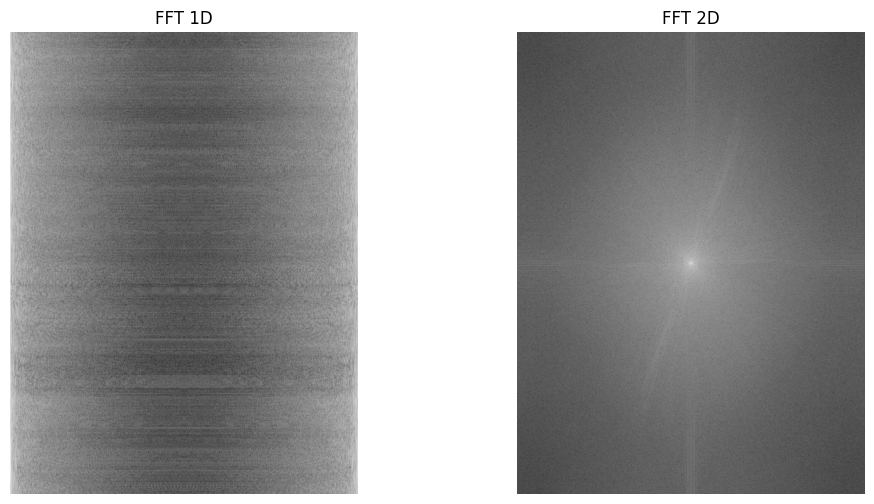

FFT image saved to: Output/FFT/1D\mycat_grayed_FFT_1D.jpg
FFT image saved to: Output/FFT/2D\mycat_grayed_FFT_2D.jpg


In [33]:
# 1D FFT
def apply_fft1d(image):
    img_array = np.asarray(image)
    fft_1d = np.abs(np.fft.fft(img_array, axis=1))
    
    # Normalisasi
    fft_1d = np.log(fft_1d + 1)
    return fft_1d

# 2D FFT
def apply_fft2d(image):
    img_array = np.asarray(image)
    fft_2d = np.fft.fft2(img_array)
    fft_2d_shifted = np.fft.fftshift(fft_2d)
    
    # Ambil magnitudo dan normalisasi
    magnitude_spectrum = np.log(np.abs(fft_2d_shifted) + 1)
    return magnitude_spectrum

def display_and_save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"FFT image saved to: {output_path}")

def process_and_display_fft(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    fft_1d = apply_fft1d(image)
    fft_2d = apply_fft2d(image)

    output_path_1d = os.path.join("Output/FFT/1D", f"{name}_FFT_1D.jpg")
    output_path_2d = os.path.join("Output/FFT/2D", f"{name}_FFT_2D.jpg")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(fft_1d, cmap="gray")
    axes[0].set_title("FFT 1D")
    axes[0].axis('off')

    axes[1].imshow(fft_2d, cmap="gray")
    axes[1].set_title("FFT 2D")
    axes[1].axis('off')

    plt.show()

    display_and_save(fft_1d, output_path_1d)
    display_and_save(fft_2d, output_path_2d)

process_and_display_fft(input_path)

## LFP

### Choose Image

In [ ]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

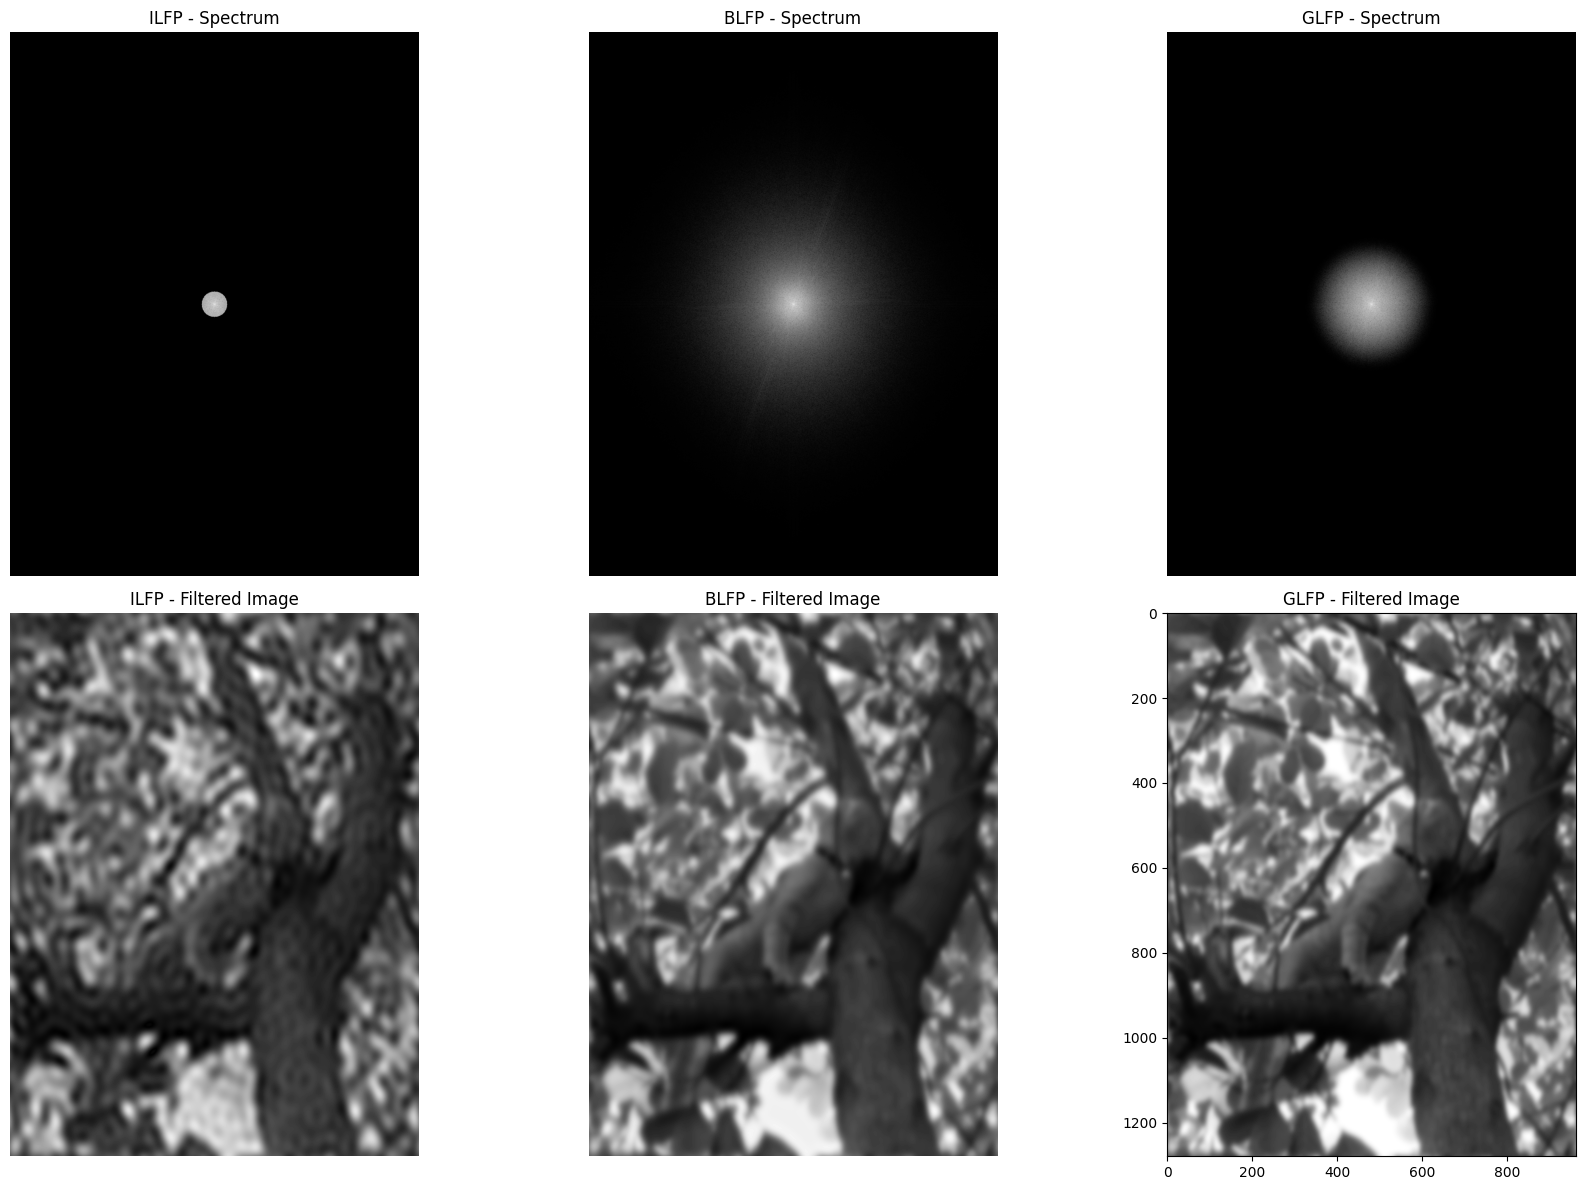

In [26]:
# Ideal LPF
def ideal_lowpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= cutoff:
                mask[i, j] = 1
            else:
                mask[i, j] = 0
    return mask

# Butterworth LPF
def butterworth_lowpass_filter(shape, cutoff, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) # menghitung nilai D
            mask[i, j] = 1 / (1 + (d / cutoff) ** (2 * n)) # rumus butterworth
    return mask

# Gaussian LPF
def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) # menghitung nilai D
            mask[i, j] = np.exp(-(d ** 2) / (2 * (cutoff ** 2))) # rumus gaussian
    return mask

def apply_fft2d(image):
    img_array = np.asarray(image, dtype=np.float32)
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)
    
    # Magnitudo spektrum (untuk visualisasi)
    magnitude_spectrum = np.log(np.abs(fft_img_shifted) + 1)
    
    return fft_img_shifted, magnitude_spectrum

def apply_filter(image, filter_mask):
    fft_img_shifted, _ = apply_fft2d(image)
    filtered_fft = fft_img_shifted * filter_mask
    
    # Inverse FFT untuk mengembalikan gambar
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_img), np.log(np.abs(filtered_fft) + 1)

def process_and_display_lfp(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = Image.open(image_path)
    shape = image.size[::-1]  # Tukar urutan agar (rows, cols)
    cutoff = 30  # Radius cutoff
    n = 2  # Orde Butterworth

    ilfp_img, ilfp_spectrum = apply_filter(image, ideal_lowpass_filter(shape, cutoff))
    blfp_img, blfp_spectrum = apply_filter(image, butterworth_lowpass_filter(shape, cutoff, n))
    glfp_img, glfp_spectrum = apply_filter(image, gaussian_lowpass_filter(shape, cutoff))

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    axes[0, 0].imshow(ilfp_spectrum, cmap='gray')
    axes[0, 0].set_title("ILFP - Spectrum")
    axes[0, 0].axis('off')
    axes[1, 0].imshow(ilfp_img, cmap='gray')
    axes[1, 0].set_title("ILFP - Filtered Image")
    axes[1, 0].axis('off')

    axes[0, 1].imshow(blfp_spectrum, cmap='gray')
    axes[0, 1].set_title("BLFP - Spectrum")
    axes[0, 1].axis('off')
    axes[1, 1].imshow(blfp_img, cmap='gray')
    axes[1, 1].set_title("BLFP - Filtered Image")
    axes[1, 1].axis('off')

    axes[0, 2].imshow(glfp_spectrum, cmap='gray')
    axes[0, 2].set_title("GLFP - Spectrum")
    axes[0, 2].axis('off')
    axes[1, 2].imshow(glfp_img, cmap='gray')
    axes[1, 2].set_title("GLFP - Filtered Image")
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

process_and_display_lfp(input_path)


## HPF

### Choose Image

In [50]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

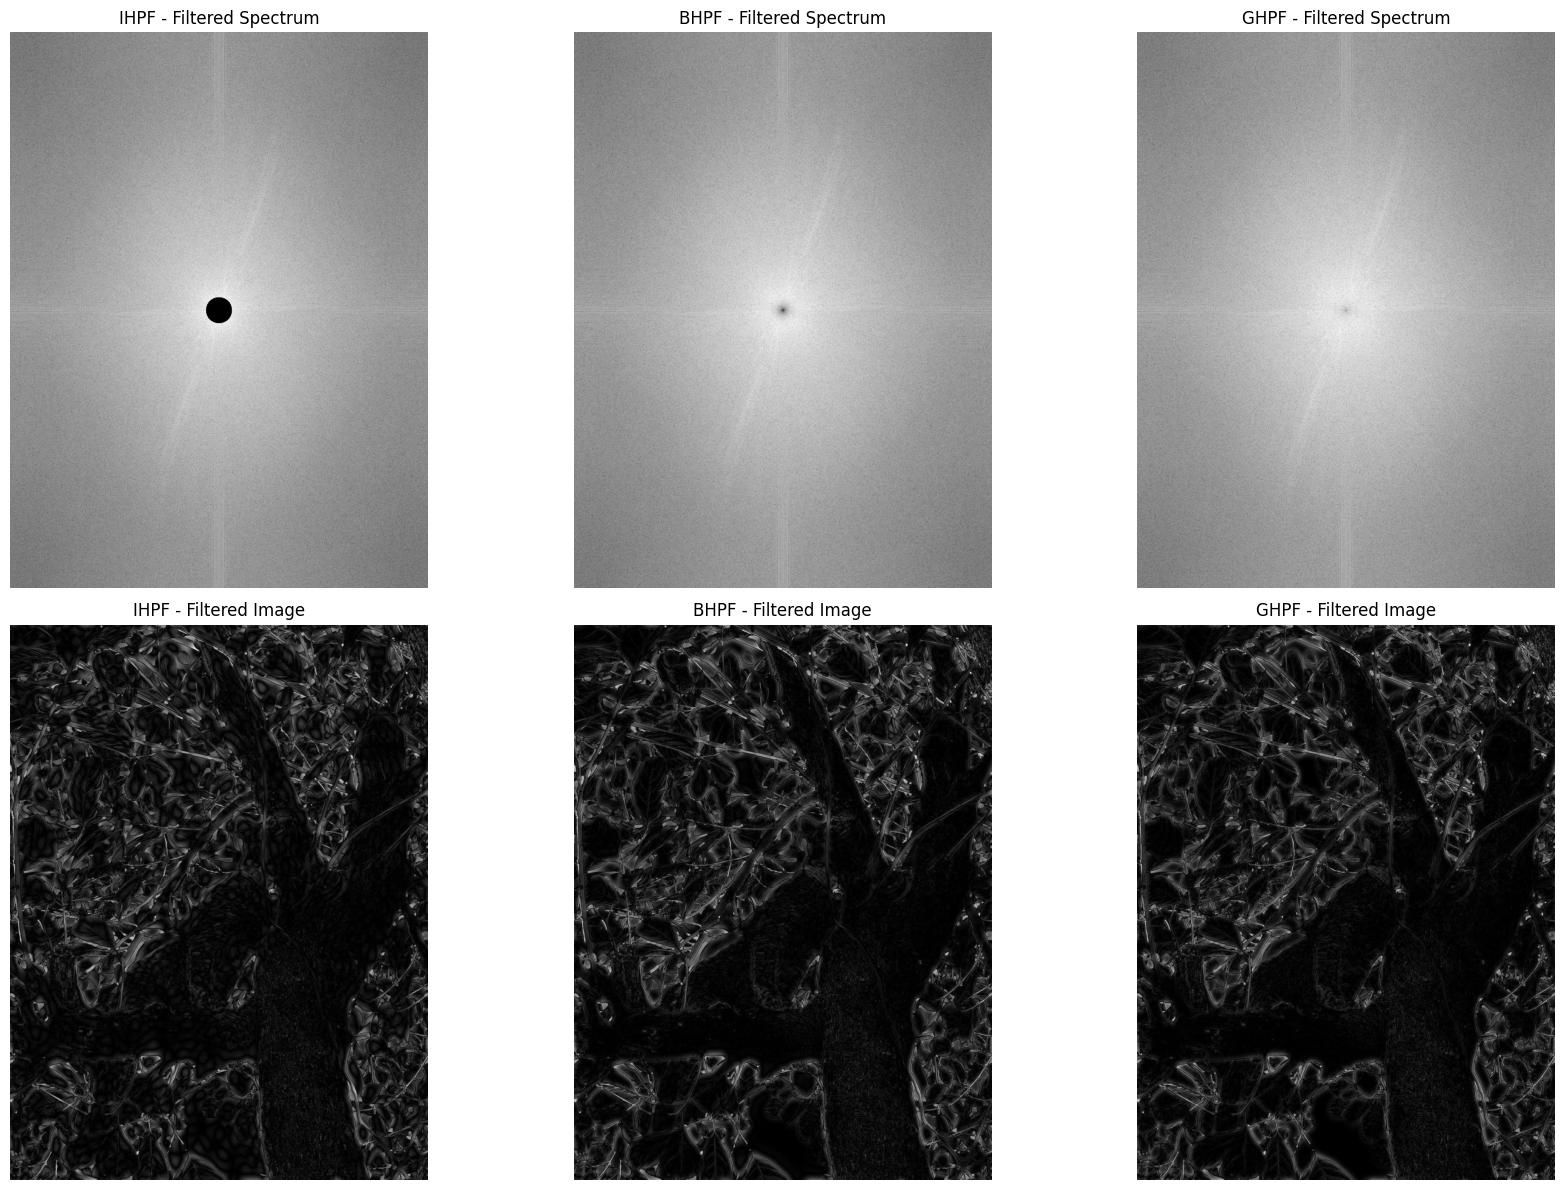

Filtered image saved to: Output/HPF/IHPF\mycat_grayed_IHPF.jpg
Filtered image saved to: Output/HPF/BHPF\mycat_grayed_BHPF.jpg
Filtered image saved to: Output/HPF/GHPF\mycat_grayed_GHPF.jpg


In [ ]:
# Ideal HPF
def ideal_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= cutoff:
                mask[i, j] = 0
            else:
                mask[i, j] = 1
    return mask

# Butterworth HPF
def butterworth_highpass_filter(shape, cutoff, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (cutoff / d) ** (2 * n)) if d > 0 else 0
    return mask

# Gaussian HPF
def gaussian_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 - np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

def apply_fft2d(image):
    img_array = np.asarray(image, dtype=np.float32)
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)
    
    # Magnitudo spektrum untuk visualisasi
    magnitude_spectrum = np.log(np.abs(fft_img_shifted) + 1)
    
    return fft_img_shifted, magnitude_spectrum

def apply_filter(image, filter_mask):
    fft_img_shifted, _ = apply_fft2d(image)
    filtered_fft = fft_img_shifted * filter_mask

    filtered_spectrum = np.log(np.abs(filtered_fft) + 1)
    
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    
    return np.abs(filtered_img), filtered_spectrum

def save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"Filtered image saved to: {output_path}")

def process_and_display_hpf(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = Image.open(image_path)
    shape = image.size[::-1]  # Tukar urutan menjadi (rows, cols)
    cutoff = 30  # Radius cutoff
    n = 2  # Orde Butterworth

    ihpf_img, ihpf_spectrum = apply_filter(image, ideal_highpass_filter(shape, cutoff))
    bhpf_img, bhpf_spectrum = apply_filter(image, butterworth_highpass_filter(shape, cutoff, n))
    ghpf_img, ghpf_spectrum = apply_filter(image, gaussian_highpass_filter(shape, cutoff))

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    axes[0, 0].imshow(ihpf_spectrum, cmap='gray')
    axes[0, 0].set_title("IHPF - Filtered Spectrum")
    axes[0, 0].axis('off')
    axes[1, 0].imshow(ihpf_img, cmap='gray')
    axes[1, 0].set_title("IHPF - Filtered Image")
    axes[1, 0].axis('off')

    axes[0, 1].imshow(bhpf_spectrum, cmap='gray')
    axes[0, 1].set_title("BHPF - Filtered Spectrum")
    axes[0, 1].axis('off')
    axes[1, 1].imshow(bhpf_img, cmap='gray')
    axes[1, 1].set_title("BHPF - Filtered Image")
    axes[1, 1].axis('off')

    axes[0, 2].imshow(ghpf_spectrum, cmap='gray')
    axes[0, 2].set_title("GHPF - Filtered Spectrum")
    axes[0, 2].axis('off')
    axes[1, 2].imshow(ghpf_img, cmap='gray')
    axes[1, 2].set_title("GHPF - Filtered Image")
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    output_path_ihpf = os.path.join("Output/HPF/IHPF", f"{name}_IHPF.jpg")
    output_path_bhpf = os.path.join("Output/HPF/BHPF", f"{name}_BHPF.jpg")
    output_path_ghpf = os.path.join("Output/HPF/GHPF", f"{name}_GHPF.jpg")

    save(ihpf_img, output_path_ihpf)
    save(bhpf_img, output_path_bhpf)
    save(ghpf_img, output_path_ghpf)

process_and_display_hpf(input_path)



## Homomorphic Filter

### Choose Image

In [24]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

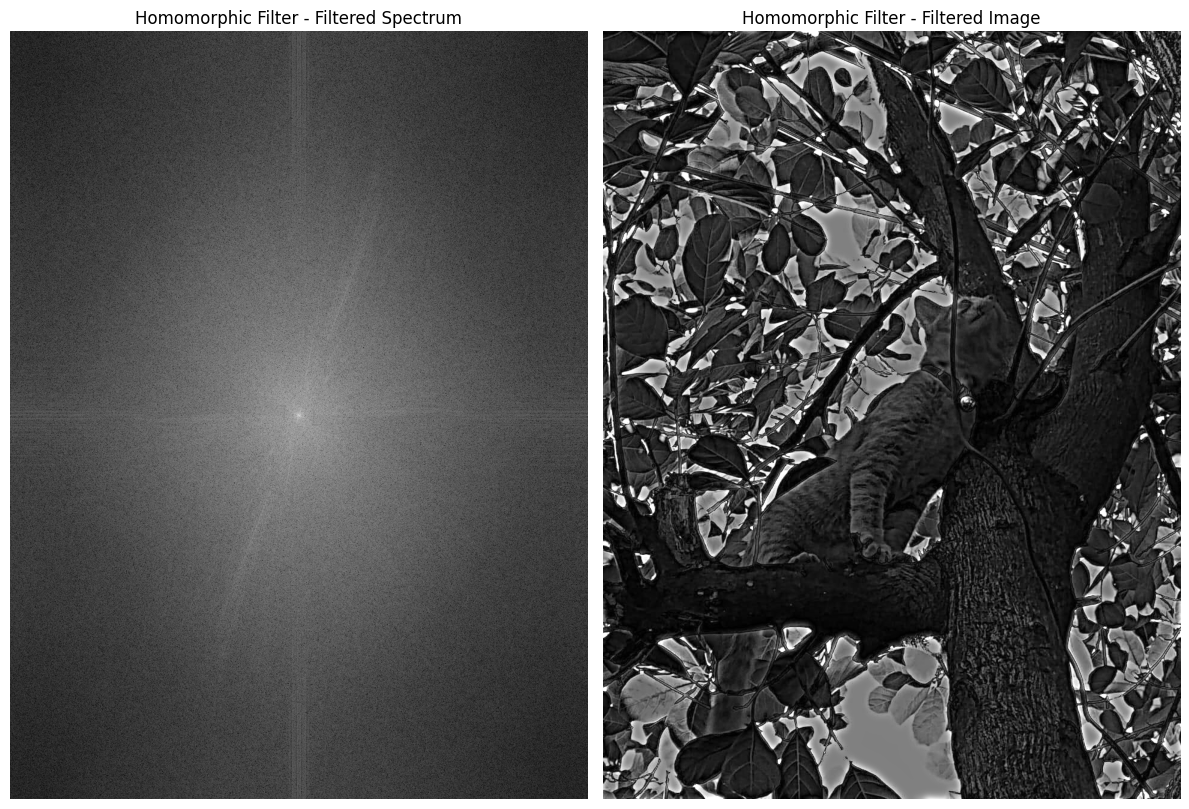

Filtered image saved to: Output/HomomorphicFilter\mycat_grayed_Homomorphic_Filter.jpg


In [ ]:
def apply_fft2d(image):
    img_array = np.asarray(image, dtype=np.float32) / 255.0
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)

    # Magnitudo spektrum untuk visualisasi
    magnitude_spectrum = np.log(np.abs(fft_img_shifted) + 1)

    return fft_img_shifted, magnitude_spectrum

def homomorphic_filter(image, gamma_l=0.5, gamma_h=2.0, cutoff=30):
    fft_img_shifted, _ = apply_fft2d(image)

    rows, cols = image.size[::-1]
    crow, ccol = rows // 2, cols // 2

    y, x = np.ogrid[:rows, :cols]
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)

    hpf_mask = 1 - np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    lpf_mask = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))

    filtered_fft = (gamma_h * hpf_mask + gamma_l * lpf_mask) * fft_img_shifted #rumus homomorphic

    filtered_spectrum = np.log(np.abs(filtered_fft) + 1)

    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_img = np.abs(filtered_img)
    filtered_img = np.clip(filtered_img, 0, 1)  # Normalisasi

    return filtered_img, filtered_spectrum

def save(image_array, title, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"Filtered image saved to: {output_path}")

def process_and_display_homomorphic_filter(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = Image.open(image_path)

    homomorphic_img, homomorphic_spectrum = homomorphic_filter(image)

    fig, axes = plt.subplots(1, 2, figsize=(12, 12))

    axes[0].imshow(homomorphic_spectrum, cmap='gray')
    axes[0].set_title("Homomorphic Filter - Filtered Spectrum")
    axes[0].axis('off')

    axes[1].imshow(homomorphic_img, cmap='gray')
    axes[1].set_title("Homomorphic Filter - Filtered Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    output_path_homomorphic = os.path.join("Output/HomomorphicFilter", f"{name}_Homomorphic_Filter.jpg")
    save(homomorphic_img, "Homomorphic Filter", output_path_homomorphic)

process_and_display_homomorphic_filter(input_path)
